In [7]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [36]:
elg_raw = pd.read_csv('../RCS data backup/Data/S315_elg.csv')

def calculate_uv(wind_speed, wind_direction):
    return -wind_speed * np.sin(np.deg2rad(wind_direction)), wind_speed * np.cos(np.deg2rad(wind_direction))

u, v = calculate_uv(elg_raw['wind_sp'], elg_raw['wind_dir'])

datetimes = []
for dttm in elg_raw['dttm']:
    datetimes.append(np.datetime64(dttm[:-1]))

elg_ds = xr.Dataset(
    data_vars=dict(
        lat=('time',elg_raw['lat']),
        lon=('time',elg_raw['lon']),
        temp=('time',elg_raw['temp']),
        salinity=('time',elg_raw['sal']),
        fluor=('time',elg_raw['fluor']),
        cdom=('time',elg_raw['cdom']),
        wind_u=('time',u),
        wind_v=('time',v),
    ),
    coords=dict(
        time=datetimes
    )
)

elg_ds.to_netcdf('../data/derived shipdata/elg.nc')

In [34]:
elg_ds

<xarray.Dataset>
Dimensions:   (time: 454)
Coordinates:
  * time      (time) datetime64[ns] 2024-05-10T22:00:00 ... 2024-05-29T19:00:00
Data variables:
    lat       (time) float64 -17.48 -17.37 -17.25 -17.14 ... -23.04 -23.07 -23.1
    lon       (time) float64 -149.6 -149.5 -149.5 ... -135.1 -135.1 -135.1
    temp      (time) float64 28.89 28.88 28.91 28.92 ... 24.27 24.24 24.26 24.25
    salinity  (time) float64 35.84 35.86 35.85 35.84 ... 35.83 35.81 35.81 35.81
    fluor     (time) float64 5.444 4.018 3.093 2.981 ... 2.891 2.88 2.785 2.745
    cdom      (time) float64 28.83 28.4 28.5 28.47 ... 27.1 26.72 27.33 27.17
    wind_u    (time) float64 -14.01 -9.384 -8.282 ... -8.163 -7.909 -5.369
    wind_v    (time) float64 7.05 5.782 5.762 5.89 ... 1.681 1.44 1.075 1.559

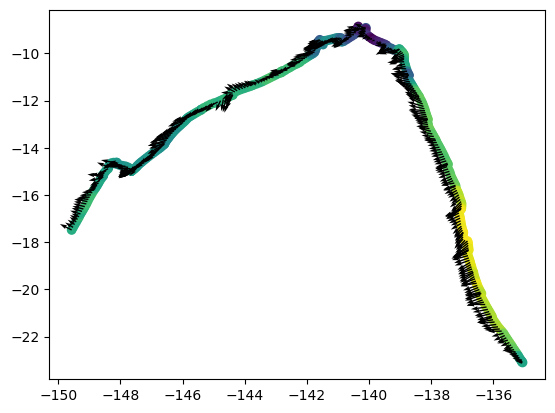

In [33]:
plt.scatter(elg_ds.lon, elg_ds.lat, c=elg_ds.salinity)
plt.quiver(elg_ds.lon, elg_ds.lat, elg_ds.wind_u, elg_ds.wind_v)